Step 0. Import the necerrary modules/tools

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

Step 1. Data processing


Step 1-1 loading data - download MNIST dataset And check data


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Step 1-2 check data

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
np.set_printoptions(linewidth=np.inf)
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253, 205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,  90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253, 190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190, 253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35, 241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39, 148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221, 253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253, 253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253, 195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,  11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 136, 253, 253, 253, 212, 135, 132,  16,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

In [ ]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

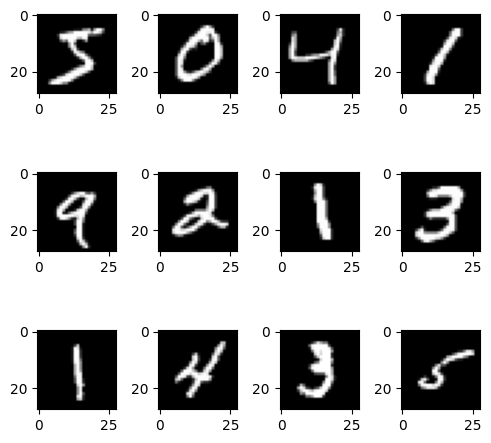

In [ ]:
plt.figure(figsize=(5,5))
for k in range(12) :
  plt.subplot(3,4,k+1)
  plt.imshow(x_train[k], cmap='gray')
plt.tight_layout()
plt.show()


Step 1-3 data processing

In [ ]:
# For sample X, the training samples
# change data dimension and data type
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')
# mapping data distribution in 0 - 1
x_train /= 255
x_test /= 255
# check data
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.       

In [ ]:
# For sample Y, the data label
# define classes
n = 10
# convert Y(label) to one-hot code
y_train = to_categorical(y_train, n)
y_test = to_categorical(y_test, n)
# check data
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Step 2 create neural network

Step 2-1 Define network/model structure

In [ ]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

Step 2-2 Compile(Compose) network

In [ ]:
# compose model
model.compile(loss='mean_squared_error',
              optimizer=optimizers.SGD(learning_rate=0.01),
              metrics=[ 'accuracy'])

Step 2-3 Check the model parameters

In [ ]:
# check model parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Step 3 Train it!

In [ ]:
model.fit(x_train, y_train,
          batch_size=128,
          epochs=200,
          verbose=1,
          validation_data=(x_test,y_test))

Epoch 1/200
469/469 [==============================] - 4s 7ms/step - loss: 0.0914 - accuracy: 0.0925 - val_loss: 0.0910 - val_accuracy: 0.1013
Epoch 2/200
469/469 [==============================] - 3s 7ms/step - loss: 0.0907 - accuracy: 0.1111 - val_loss: 0.0904 - val_accuracy: 0.1207
Epoch 3/200
469/469 [==============================] - 4s 8ms/step - loss: 0.0902 - accuracy: 0.1259 - val_loss: 0.0899 - val_accuracy: 0.1320
Epoch 4/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0897 - accuracy: 0.1336 - val_loss: 0.0895 - val_accuracy: 0.1379
Epoch 5/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0894 - accuracy: 0.1458 - val_loss: 0.0892 - val_accuracy: 0.1586
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0890 - accuracy: 0.1697 - val_loss: 0.0888 - val_accuracy: 0.1807
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0887 - accuracy: 0.1946 - val_loss: 0.0885 - val_accuracy: 0.2095